# The rotation solution vector

#### Code to compute the terms in the solution vector $\mathbf{r}$ and compare to numerical integration

We begin by importing some stuff and defining our functions:

In [1]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
from scipy import integrate
from scipy.special import gamma

In [2]:
def ptilde(n, x, y):
    """Return the n^th term in the polynomial basis as a function of x and y."""
    if n == 0:
        return 1
    l = int(np.floor(np.sqrt(n)))
    m = n - l * l - l
    mu = l - m
    nu = l + m
    if (nu % 2 == 0):
        i = mu // 2
        j = nu // 2
        return x ** i * y ** j
    else:
        i = (mu - 1) // 2
        j = (nu - 1) // 2
        return x ** i * y ** j * np.sqrt(1 - x * x - y * y)

def rn_numerical(n):
    """Compute the n^th term in the rotation solution vector `r` by numerical integration."""
    f = lambda y, x: ptilde(n, x, y)
    y, err = integrate.dblquad(f, -1, 1, lambda x: -np.sqrt(1 - x * x), lambda x: np.sqrt(1 - x * x))
    return y

def rn(n):
    """Compute the n^th term in the rotation solution vector `r` analytically."""
    l = int(np.floor(np.sqrt(n)))
    m = n - l * l - l
    mu = l - m
    nu = l + m
    if (mu % 2 == 0) and ((mu / 2) % 2 == 0) and (nu % 2 == 0) and ((nu / 2) % 2 == 0): 
        return gamma(mu / 4 + 0.5) * gamma(nu / 4 + 0.5) / gamma((mu + nu) / 4 + 2)
    elif ((mu - 1) % 2 == 0) and (((mu - 1) / 2) % 2 == 0) and ((nu - 1) % 2 == 0) and (((nu - 1) / 2) % 2 == 0): 
        return 0.5 * np.sqrt(np.pi) * gamma(mu / 4 + 0.25) * gamma(nu / 4 + 0.25) / gamma((mu + nu) / 4 + 2)
    else:
        return 0

Let's compare the numerical evaluation of the double integral to our expression involving Gamma functions for the first 50 values of $n$:

In [16]:
analytical = np.array([rn(n) for n in range(50)])
numerical = np.array([rn_numerical(n) for n in range(50)])

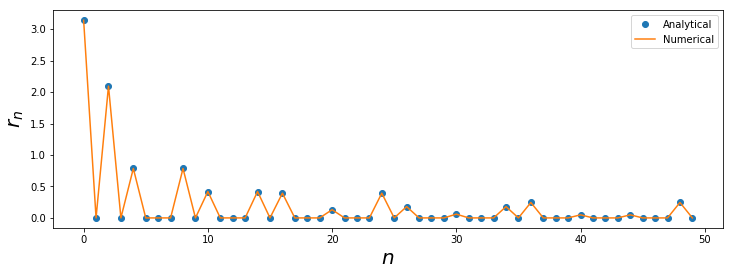

In [14]:
fig, ax = pl.subplots(1, figsize=(12, 4))
ax.plot(range(50), analytical, 'o', label='Analytical')
ax.plot(range(50), numerical, label='Numerical')
ax.legend(loc='upper right');
ax.set_ylabel('$r_n$', fontsize=20);
ax.set_xlabel('$n$', fontsize=20);

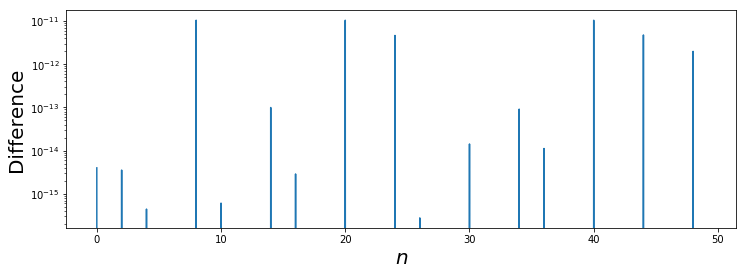

In [18]:
fig, ax = pl.subplots(1, figsize=(12, 4))
ax.plot(range(50), np.abs(analytical - numerical))
ax.set_ylabel('Difference', fontsize=20);
ax.set_xlabel('$n$', fontsize=20);
ax.set_yscale('log')